In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

In [3]:
# 1) Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #since image was read using mpimg.imread()
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if image was read using cv2.imread()

In [4]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel_value = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == 'y':
        sobel_value = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    else:
        print("You must specify an orientation - x or y")
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel_value)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
    grad_binary = np.zeros_like(scaled_sobel)
    # 6) Return this mask as your binary_output image
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    #grad_binary = np.copy(img) # Remove this line
    return grad_binary

In [5]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the gradient magnitude 
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_8bit_magnitude = np.uint8(255*magnitude/np.max(magnitude))
    # 5) Create a binary mask where mag thresholds are met
    mag_binary = np.zeros_like(scaled_8bit_magnitude)
    mag_binary[(scaled_8bit_magnitude >= mag_thresh[0]) & (scaled_8bit_magnitude <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #mag_binary = np.copy(img) # Remove this line
    return mag_binary


In [6]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    gradient_dir = np.arctan2(abs_sobel_y, abs_sobel_x)
    # 5) Create a binary mask where direction thresholds are met
    dir_binary = np.zeros_like(gradient_dir)
    dir_binary[(gradient_dir >= thresh[0]) & (gradient_dir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #dir_binary = np.copy(img) # Remove this line
    return dir_binary

In [7]:
# Choose a Sobel kernel size
ksize = 17 # Choose a larger odd number to smooth gradient measurements

In [8]:
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100)) #20,100
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100)) #20,100
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100)) #30,100
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3)) #0.7,1.3

#print(gradx)
#print(grady)
#print(mag_binary)
#print(dir_binary)

In [9]:
combined_binary = np.zeros_like(dir_binary)
combined_binary[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

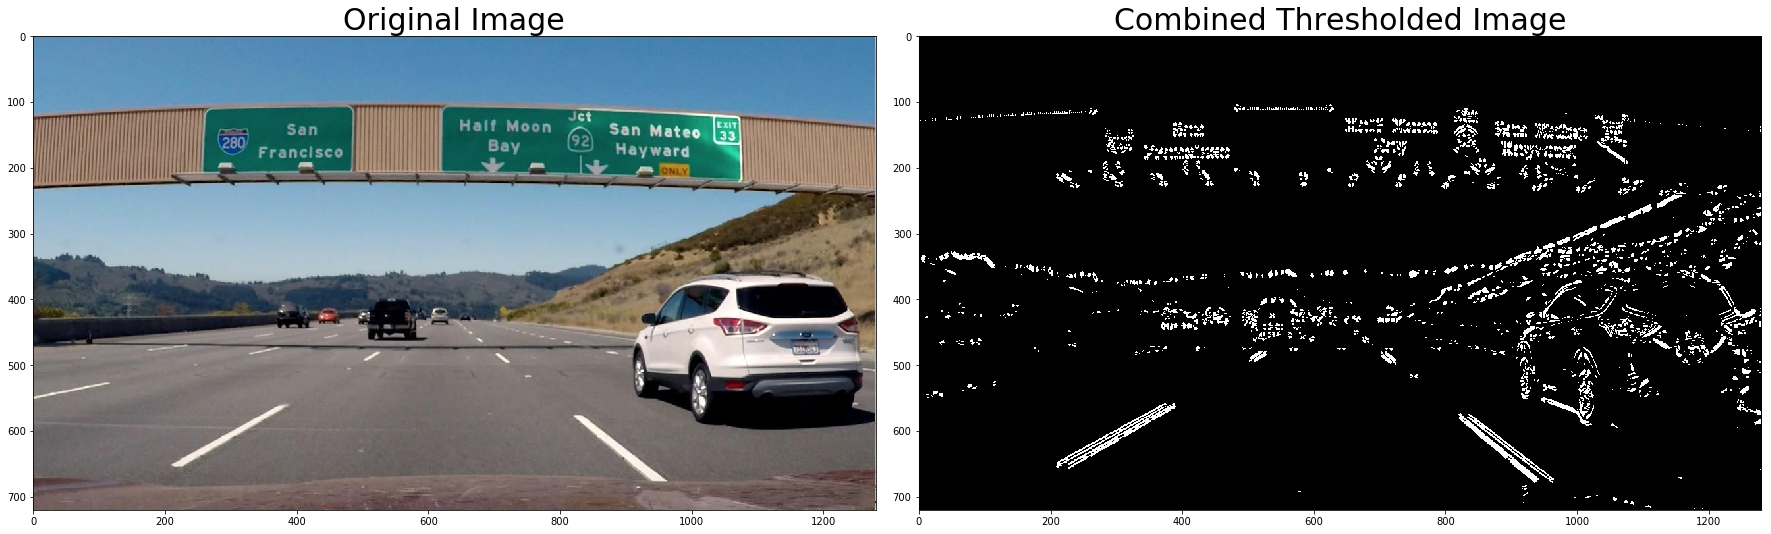

In [10]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined_binary, cmap='gray')
ax2.set_title('Combined Thresholded Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig("combined_signs_vehicles_xygrad.png")
plt.show()